In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
fifa2017 = pd.read_csv("ff17.csv")
fifa2017["Year"] = 2017

fifa2018 = pd.read_csv("ff18.csv")
fifa2018["Year"] = 2018

fifa2019 = pd.read_csv("ff19.csv")
fifa2019["Year"] = 2019

fifa2020 = pd.read_csv("ff20.csv")
fifa2020["Year"] = 2020

fifa2021 = pd.read_csv("ff21.csv")
fifa2021["Year"] = 2021

fifa2022 = pd.read_csv("ff22.csv")
fifa2022["Year"] = 2022

fifa2023 = pd.read_csv("ff23.csv")
fifa2023["Year"] = 2023

combined1 = pd.concat(
    [fifa2017, fifa2018, fifa2019, fifa2020, fifa2021, fifa2022],
    ignore_index=True, sort=False
)

# inner join  for 2017–2023
# Step 1: find common columns
col_sets = [
    set(df.columns) for df in
    [fifa2017, fifa2018, fifa2019, fifa2020, fifa2021, fifa2022, fifa2023]
]
common_cols = set.intersection(*col_sets)

# Step 2: subset each df to those columns
dfs_common = [df[list(common_cols)] for df in
              [fifa2017, fifa2018, fifa2019, fifa2020, fifa2021, fifa2022, fifa2023]]

# Step 3: concat
combined2 = pd.concat(dfs_common, ignore_index=True, sort=False)

print("combined1 shape:", combined1.shape)
print("combined1 years:", combined1["Year"].unique())
print("combined2 shape:", combined2.shape)
print("combined2 years:", combined2["Year"].unique())
print("combined2 columns:", len(combined2.columns))

combined1 shape: (104352, 67)
combined1 years: [2017 2018 2019 2020 2021 2022]
combined2 shape: (122012, 27)
combined2 years: [2017 2018 2019 2020 2021 2022 2023]
combined2 columns: 27


In [33]:
print("Columns in 2023 dataset:")
print(fifa2023.columns.tolist())

Columns in 2023 dataset:
['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause', 'Kit Number', 'Best Overall Rating', 'Year']


In [ ]:
print("Combined1 (2017–2022):", combined1.shape)
print("Combined2 (2017–2023):", combined2.shape)

print("Columns in Combined1:", len(combined1.columns))
print("Columns in Combined2:", len(combined2.columns))

print("\nPlayers per year (Combined1):")
print(combined1["Year"].value_counts().sort_index())

print("\nPlayers per year (Combined2):")
print(combined2["Year"].value_counts().sort_index())

Combined1 (2017–2022): (104352, 67)
Combined2 (2017–2023): (122012, 27)
Columns in Combined1: 67
Columns in Combined2: 27

Players per year (Combined1):
Year
2017    17560
2018    17927
2019    17943
2020    17104
2021    17108
2022    16710
Name: count, dtype: int64

Players per year (Combined2):
Year
2017    17560
2018    17927
2019    17943
2020    17104
2021    17108
2022    16710
2023    17660
Name: count, dtype: int64


In [69]:
# nans for combined1 whole table
nan_counts1 = combined1.isna().sum()
nan_counts1 = nan_counts1[nan_counts1 > 0].sort_values(ascending=False)
print("\nNaN counts for Combined1:")
print(nan_counts1)



NaN counts for Combined1:
Loaned From                                                        96509
c:\Users\Admin\Downloads\archive (3)\FIFA18_official_data.csvID    86792
DefensiveAwareness                                                 56950
Marking                                                            47402
Release Clause                                                     26844
ID                                                                 17560
Joined                                                             10461
Contract Valid Until                                                2536
Club                                                                1710
Composure                                                            958
Jersey Number                                                        117
Position                                                             117
Jumping                                                              115
Curve                   

In [70]:
print("HEHE")
# nans for combined2 whole table
nan_counts2 = combined2.isna().sum()
nan_counts2 = nan_counts2[nan_counts2 > 0].sort_values(ascending=False)
print("\nNaN counts for Combined2:")
print(nan_counts2)


HEHE

NaN counts for Combined2:
Loaned From             113475
Best Overall Rating      17639
Joined                   11559
Contract Valid Until      2897
Club                      1921
Position                   152
Real Face                  119
Body Type                  119
dtype: int64


In [66]:
# Filter rows for 2023
df23 = combined2[combined2["Year"] == 2023]

# Count NaNs per column
nan_counts = df23.isna().sum()

# Keep only columns that actually have NaNs
nan_counts = nan_counts[nan_counts > 0].sort_values(ascending=False)

print("NaN counts for 2023 rows in combined2:")
print(nan_counts)

NaN counts for 2023 rows in combined2:
Best Overall Rating     17639
Loaned From             16966
Joined                   1098
Contract Valid Until      361
Club                      211
Real Face                  38
Body Type                  38
Position                   35
dtype: int64


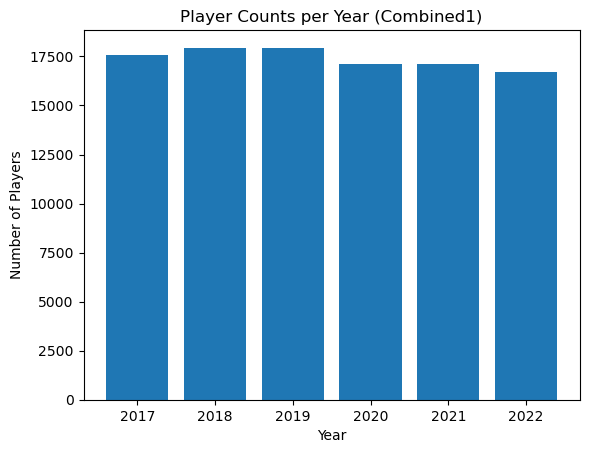

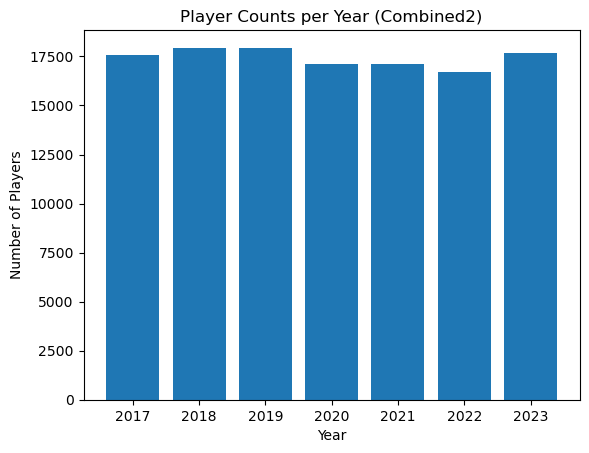

In [ ]:
player_counts1 = combined1["Year"].value_counts().sort_index()
plt.bar(player_counts1.index, player_counts1.values)
plt.title("Player Counts per Year (Combined1)")
plt.xlabel("Year")
plt.ylabel("Number of Players")
plt.show()

# Combined2 (2017–2023)
player_counts2 = combined2["Year"].value_counts().sort_index()
plt.bar(player_counts2.index, player_counts2.values)
plt.title("Player Counts per Year (Combined2)")
plt.xlabel("Year")
plt.ylabel("Number of Players")
plt.show()

Text(0, 0.5, 'Average Overall')

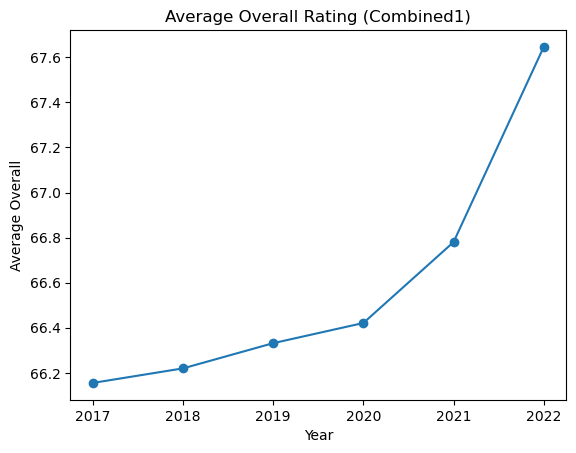

In [37]:
# Combined1
avg_overall1 = combined1.groupby("Year")["Overall"].mean()
plt.plot(avg_overall1.index, avg_overall1.values, marker="o")
plt.title("Average Overall Rating (Combined1)")
plt.xlabel("Year")
plt.ylabel("Average Overall")

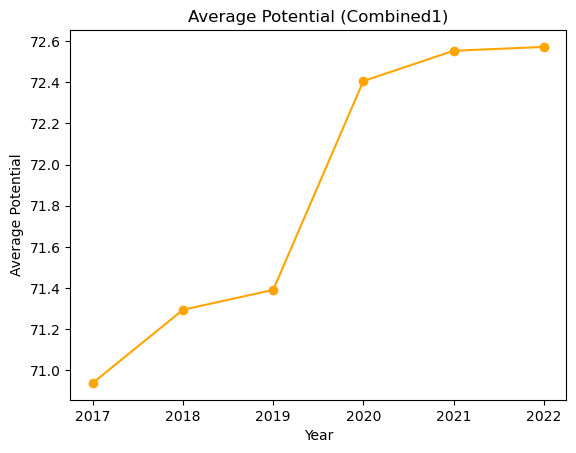

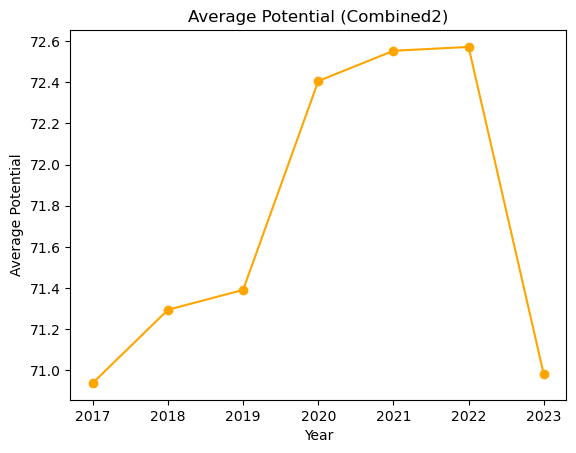

In [ ]:
# Combined1
avg_potential1 = combined1.groupby("Year")["Potential"].mean()
plt.plot(avg_potential1.index, avg_potential1.values, marker="o", color="orange")
plt.title("Average Potential (Combined1)")
plt.xlabel("Year")
plt.ylabel("Average Potential")
plt.show()

# Combined2
if "Potential" in combined2.columns:
    avg_potential2 = combined2.groupby("Year")["Potential"].mean()
    plt.plot(avg_potential2.index, avg_potential2.values, marker="o", color="orange")
    plt.title("Average Potential (Combined2)")
    plt.xlabel("Year")
    plt.ylabel("Average Potential")
    plt.show()

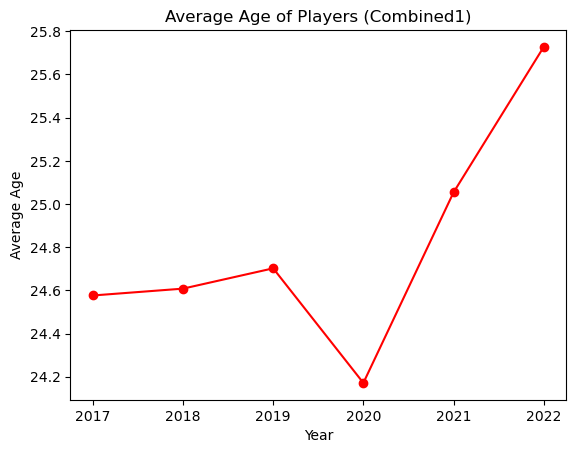

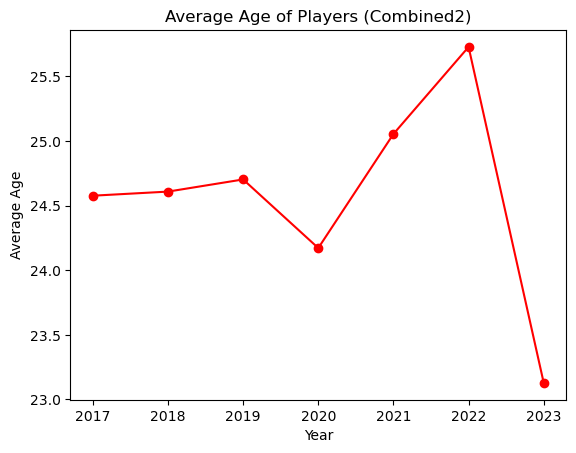

In [63]:
# Combined1
avg_age1 = combined1.groupby("Year")["Age"].mean()
plt.plot(avg_age1.index, avg_age1.values, marker="o", color="red")
plt.title("Average Age of Players (Combined1)")
plt.xlabel("Year")
plt.ylabel("Average Age")
plt.show()

# Combined2
if "Age" in combined2.columns:
    avg_age2 = combined2.groupby("Year")["Age"].mean()
    plt.plot(avg_age2.index, avg_age2.values, marker="o", color="red")
    plt.title("Average Age of Players (Combined2)")
    plt.xlabel("Year")
    plt.ylabel("Average Age")

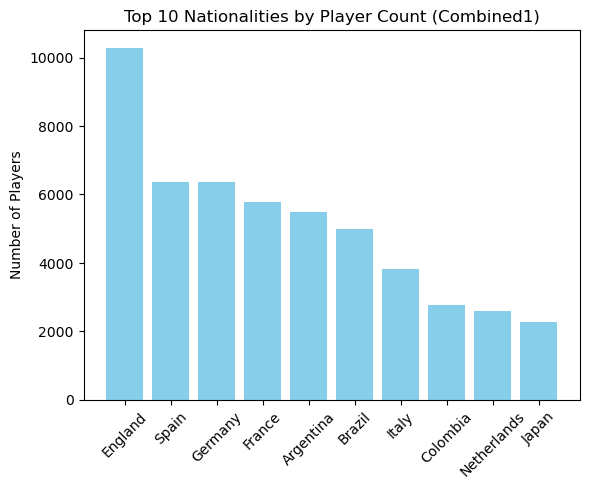

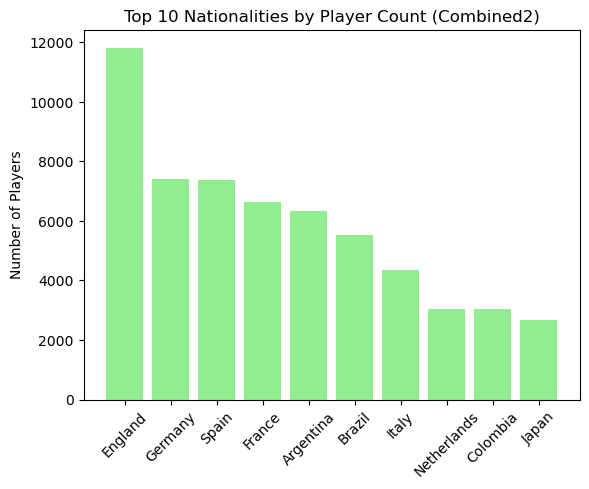

In [ ]:
top_nations1 = combined1["Nationality"].value_counts().head(10)
plt.bar(top_nations1.index, top_nations1.values, color="skyblue")
plt.title("Top 10 Nationalities by Player Count (Combined1)")
plt.xticks(rotation=45)
plt.ylabel("Number of Players")
plt.show()

# Combined2
if "Nationality" in combined2.columns:
    top_nations2 = combined2["Nationality"].value_counts().head(10)
    plt.bar(top_nations2.index, top_nations2.values, color="lightgreen")
    plt.title("Top 10 Nationalities by Player Count (Combined2)")
    plt.xticks(rotation=45)
    plt.ylabel("Number of Players")
    plt.show()

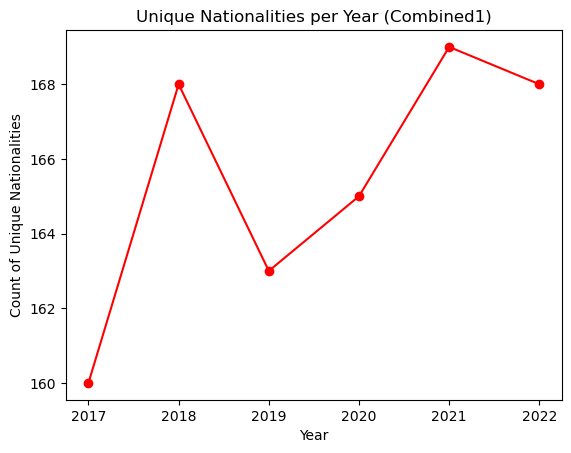

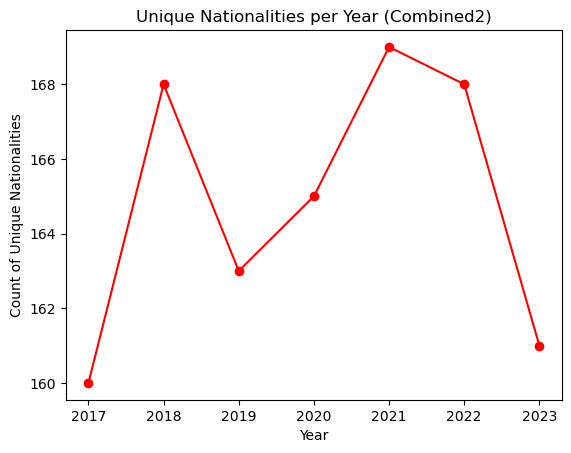

In [43]:
# Combined1
unique_nat1 = combined1.groupby("Year")["Nationality"].nunique()
plt.plot(unique_nat1.index, unique_nat1.values, marker="o", color="red")
plt.title("Unique Nationalities per Year (Combined1)")
plt.xlabel("Year")
plt.ylabel("Count of Unique Nationalities")
plt.show()

# Combined2
if "Nationality" in combined2.columns:
    unique_nat2 = combined2.groupby("Year")["Nationality"].nunique()
    plt.plot(unique_nat2.index, unique_nat2.values, marker="o", color="red")
    plt.title("Unique Nationalities per Year (Combined2)")
    plt.xlabel("Year")
    plt.ylabel("Count of Unique Nationalities")
    plt.show()


In [50]:
# regexing to convert str to float
combined1['Value'] = combined1['Value'].replace({'€': '', 'K': 'e3', 'M': 'e6'}, regex=True).map(pd.eval).astype(float) 
combined1['Wage'] = combined1['Wage'].replace({'€': '', 'K': 'e3', 'M': 'e6'}, regex=True).map(pd.eval).astype(float)


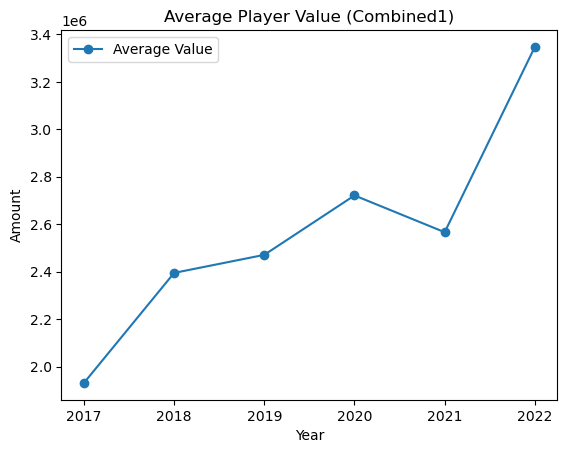

In [ ]:
# Combined1
avg_value1 = combined1.groupby("Year")["Value"].mean()

plt.plot(avg_value1.index, avg_value1.values, marker="o", label="Average Value")
plt.title("Average Player Value (Combined1)")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.legend()

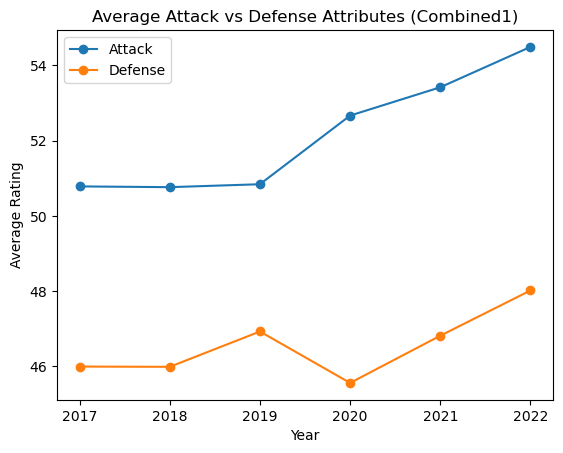

In [51]:
# Combined1
attack_cols = ["Finishing", "ShotPower", "Dribbling", "LongShots"]
defense_cols = ["StandingTackle", "SlidingTackle", "Interceptions", "Marking"]

avg_attack1 = combined1.groupby("Year")[attack_cols].mean().mean(axis=1)
avg_defense1 = combined1.groupby("Year")[defense_cols].mean().mean(axis=1)

plt.plot(avg_attack1.index, avg_attack1.values, marker="o", label="Attack")
plt.plot(avg_defense1.index, avg_defense1.values, marker="o", label="Defense")
plt.title("Average Attack vs Defense Attributes (Combined1)")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend()
plt.show()

# Combined2
needed = all(col in combined2.columns for col in attack_cols + defense_cols)
if needed:
    avg_attack2 = combined2.groupby("Year")[attack_cols].mean().mean(axis=1)
    avg_defense2 = combined2.groupby("Year")[defense_cols].mean().mean(axis=1)

    plt.plot(avg_attack2.index, avg_attack2.values, marker="o", label="Attack")
    plt.plot(avg_defense2.index, avg_defense2.values, marker="o", label="Defense")
    plt.title("Average Attack vs Defense Attributes (Combined2)")
    plt.xlabel("Year")
    plt.ylabel("Average Rating")
    plt.legend()
    plt.show()


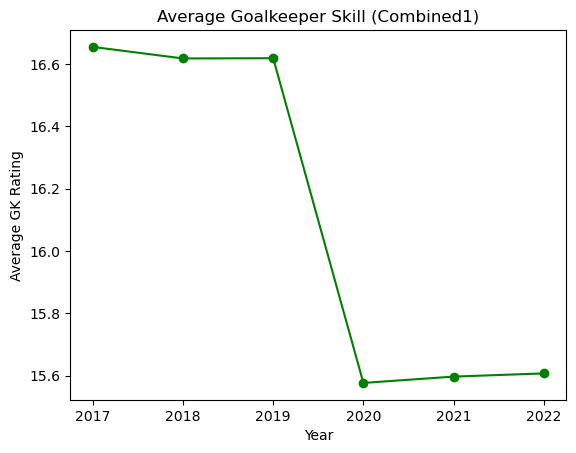

In [52]:
gk_cols = ["GKDiving", "GKHandling", "GKKicking", "GKPositioning", "GKReflexes"]

# Combined1
avg_gk1 = combined1.groupby("Year")[gk_cols].mean()
avg_gk1.mean(axis=1).plot(marker="o", color="green")
plt.title("Average Goalkeeper Skill (Combined1)")
plt.xlabel("Year")
plt.ylabel("Average GK Rating")
plt.show()

# Combined2
if all(col in combined2.columns for col in gk_cols):
    avg_gk2 = combined2.groupby("Year")[gk_cols].mean()
    avg_gk2.mean(axis=1).plot(marker="o", color="green")
    plt.title("Average Goalkeeper Skill (Combined2)")
    plt.xlabel("Year")
    plt.ylabel("Average GK Rating")
    plt.show()


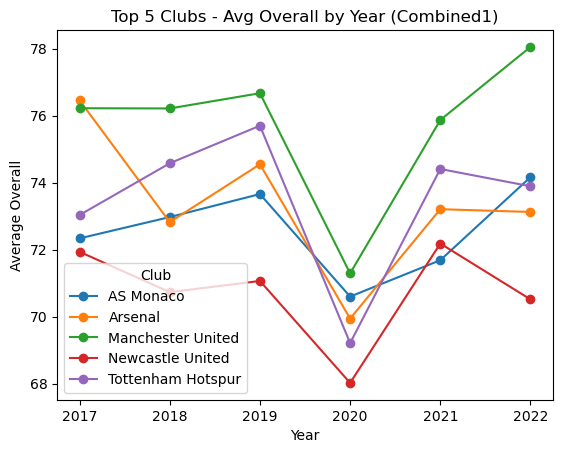

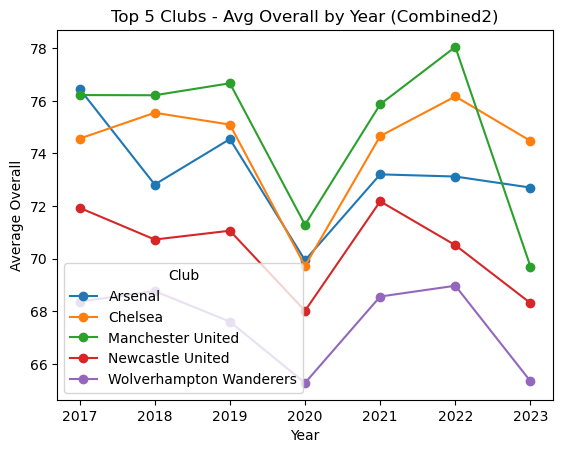

In [53]:
# Combined1
top5_clubs1 = combined1["Club"].value_counts().head(5).index
club_year1 = combined1[combined1["Club"].isin(top5_clubs1)].groupby(["Year","Club"])["Overall"].mean().unstack()
club_year1.plot(marker="o")
plt.title("Top 5 Clubs - Avg Overall by Year (Combined1)")
plt.xlabel("Year")
plt.ylabel("Average Overall")
plt.show()

# Combined2
if "Club" in combined2.columns and "Overall" in combined2.columns:
    top5_clubs2 = combined2["Club"].value_counts().head(5).index
    club_year2 = combined2[combined2["Club"].isin(top5_clubs2)].groupby(["Year","Club"])["Overall"].mean().unstack()
    club_year2.plot(marker="o")
    plt.title("Top 5 Clubs - Avg Overall by Year (Combined2)")
    plt.xlabel("Year")
    plt.ylabel("Average Overall")
    plt.show()


In [56]:
# Combined1
top3_players1 = combined1.groupby("Year").apply(
    lambda x: x.nlargest(3, "Overall")[["Name","Overall","Club","Year"]]
).reset_index(drop=True)

print("Top 3 Players per Year (Combined1):")
print(top3_players1)

# Combined2
if "Overall" in combined2.columns and "Name" in combined2.columns:
    top3_players2 = combined2.groupby("Year").apply(
        lambda x: x.nlargest(3, "Overall")[["Name","Overall","Club","Year"]]
    ).reset_index(drop=True)

    print("\nTop 3 Players per Year (Combined2):")
    print(top3_players2)


Top 3 Players per Year (Combined1):
                  Name  Overall                 Club  Year
0    Cristiano Ronaldo       94          Real Madrid  2017
1             L. Messi       93         FC Barcelona  2017
2            L. Suárez       92         FC Barcelona  2017
3    Cristiano Ronaldo       94          Real Madrid  2018
4             L. Messi       94         FC Barcelona  2018
5            L. Suárez       92         FC Barcelona  2018
6    Cristiano Ronaldo       94             Juventus  2019
7             L. Messi       94         FC Barcelona  2019
8            Neymar Jr       92  Paris Saint-Germain  2019
9             L. Messi       94         FC Barcelona  2020
10   Cristiano Ronaldo       93             Juventus  2020
11           Neymar Jr       92  Paris Saint-Germain  2020
12            L. Messi       93         FC Barcelona  2021
13   Cristiano Ronaldo       92             Juventus  2021
14        K. De Bruyne       91      Manchester City  2021
15            L. Mes

In [ ]:
# Example for 2020
top10_2020 = combined1[combined1["Year"]==2020].nlargest(10, "Overall")[["Name","Overall","Club"]]
print(top10_2020)

                     Name  Overall                 Club
53441            L. Messi       94         FC Barcelona
53451   Cristiano Ronaldo       93             Juventus
53492           Neymar Jr       92  Paris Saint-Germain
53433        K. De Bruyne       91      Manchester City
53499      R. Lewandowski       91    FC Bayern München
53550           E. Hazard       91          Real Madrid
53631         V. van Dijk       91            Liverpool
67207            J. Oblak       91      Atlético Madrid
53460            M. Salah       90            Liverpool
53465             S. Mané       90            Liverpool


In [71]:
top3_players1 = combined1.groupby("Year").apply(
    lambda x: x.nlargest(3, "Overall")[["Name","Overall","Club","Year"]]
).reset_index(drop=True)

if "Overall" in combined2.columns and "Name" in combined2.columns:
    top3_players2 = combined2.groupby("Year").apply(
        lambda x: x.nlargest(3, "Overall")[["Name","Overall","Club","Year"]]
    ).reset_index(drop=True)

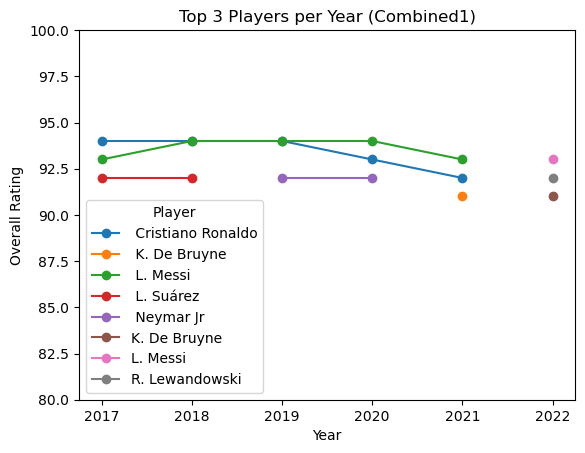

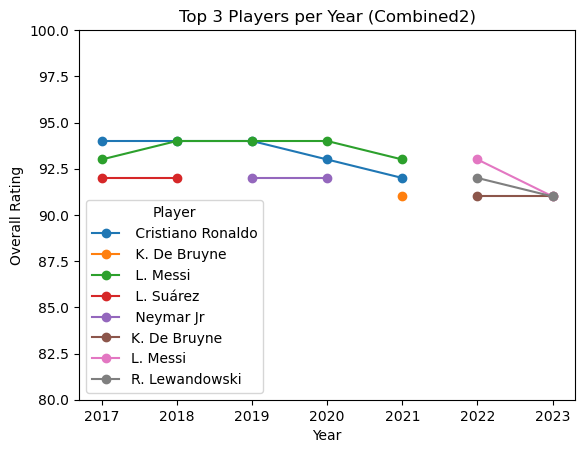

In [72]:
# Combined1
top3_players1 = combined1.groupby("Year").apply(
    lambda x: x.nlargest(3, "Overall")[["Name","Overall","Year"]]
).reset_index(drop=True)

# Pivot so each player becomes a column (Year on index)
timeline1 = top3_players1.pivot_table(index="Year", columns="Name", values="Overall", aggfunc="max")

# Plot
timeline1.plot(marker="o")
plt.title("Top 3 Players per Year (Combined1)")
plt.xlabel("Year")
plt.ylabel("Overall Rating")
plt.ylim(80, 100)  # reasonable FIFA scale
plt.legend(title="Player")
plt.show()


# Combined2
if "Overall" in combined2.columns and "Name" in combined2.columns:
    top3_players2 = combined2.groupby("Year").apply(
        lambda x: x.nlargest(3, "Overall")[["Name","Overall","Year"]]
    ).reset_index(drop=True)

    timeline2 = top3_players2.pivot_table(index="Year", columns="Name", values="Overall", aggfunc="max")

    timeline2.plot(marker="o")
    plt.title("Top 3 Players per Year (Combined2)")
    plt.xlabel("Year")
    plt.ylabel("Overall Rating")
    plt.ylim(80, 100)
    plt.legend(title="Player")
    plt.show()

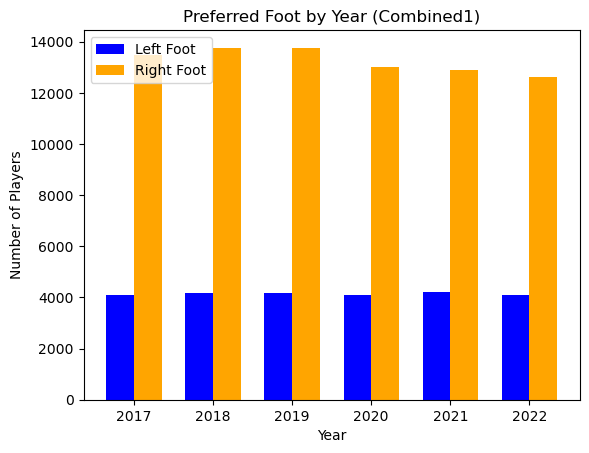

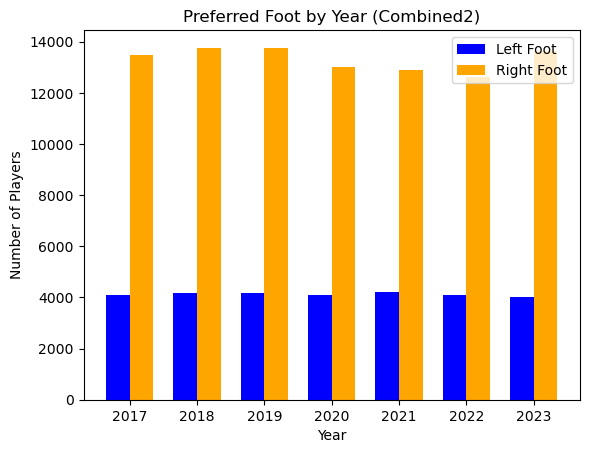

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Combined1 (2017–2022)
foot_counts1 = combined1.groupby(["Year","Preferred Foot"]).size().unstack().fillna(0)

# Plot
x = np.arange(len(foot_counts1.index))  # years positions
width = 0.35  # bar width

plt.bar(x - width/2, foot_counts1["Left"], width, label="Left Foot", color="blue")
plt.bar(x + width/2, foot_counts1["Right"], width, label="Right Foot", color="orange")

plt.xticks(x, foot_counts1.index)
plt.xlabel("Year")
plt.ylabel("Number of Players")
plt.title("Preferred Foot by Year (Combined1)")
plt.legend()
plt.show()


# Combined2 (2017–2023 if column exists)
if "Preferred Foot" in combined2.columns:
    foot_counts2 = combined2.groupby(["Year","Preferred Foot"]).size().unstack().fillna(0)

    x = np.arange(len(foot_counts2.index))
    width = 0.35

    plt.bar(x - width/2, foot_counts2["Left"], width, label="Left Foot", color="blue")
    plt.bar(x + width/2, foot_counts2["Right"], width, label="Right Foot", color="orange")

    plt.xticks(x, foot_counts2.index)
    plt.xlabel("Year")
    plt.ylabel("Number of Players")
    plt.title("Preferred Foot by Year (Combined2)")
    plt.legend()
    plt.show()


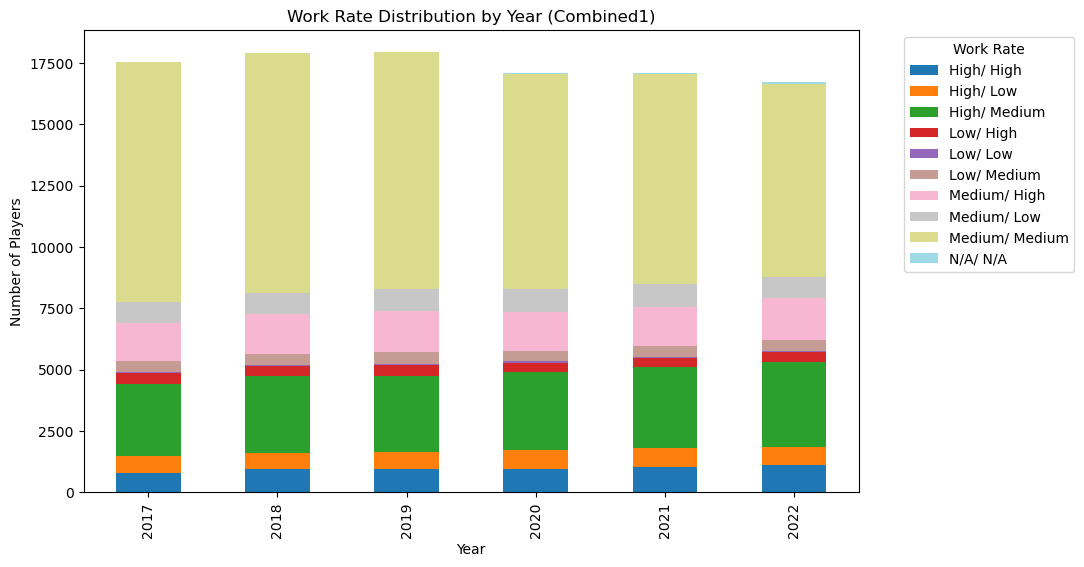

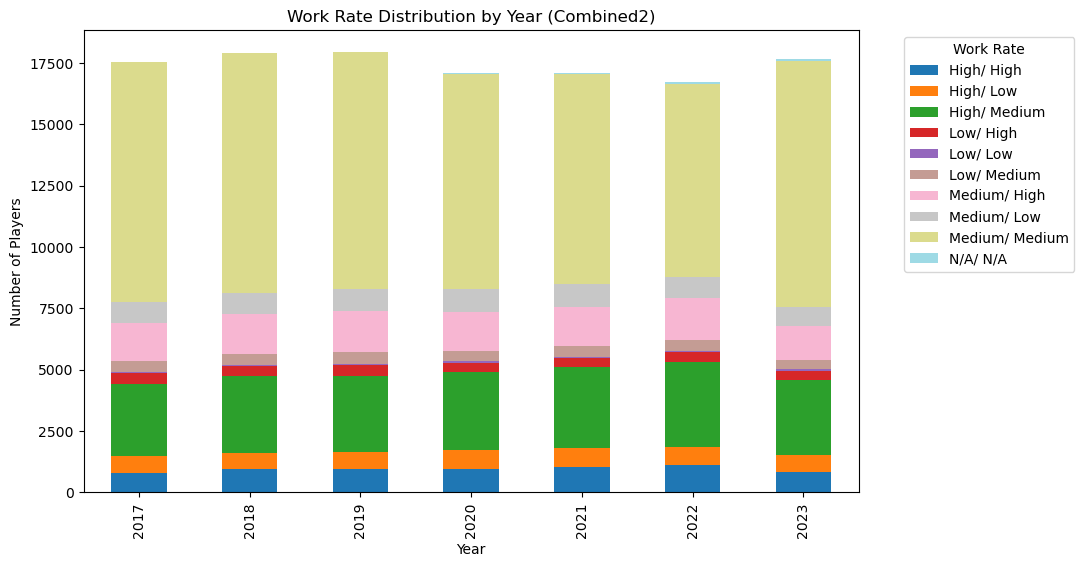

In [65]:
import matplotlib.pyplot as plt

# Combined1 (2017–2022)
work_counts1 = combined1.groupby(["Year","Work Rate"]).size().unstack().fillna(0)

# stacked bar chart (shows proportion of each work rate per year)
work_counts1.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Work Rate Distribution by Year (Combined1)")
plt.xlabel("Year")
plt.ylabel("Number of Players")
plt.legend(title="Work Rate", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


# Combined2 (2017–2023) → only if Work Rate exists
if "Work Rate" in combined2.columns:
    work_counts2 = combined2.groupby(["Year","Work Rate"]).size().unstack().fillna(0)

    work_counts2.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
    plt.title("Work Rate Distribution by Year (Combined2)")
    plt.xlabel("Year")
    plt.ylabel("Number of Players")
    plt.legend(title="Work Rate", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()
